In [1]:
from sentence_transformers import SentenceTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd

# Load model
model = SentenceTransformer("dunzhang/stella_en_1.5B_v5", trust_remote_code=True).cuda()

# Load datasets
train_data = pd.read_csv("../2_preprocessing/train_case_sensitive.csv")
val_data = pd.read_csv("../2_preprocessing/validation_case_sensitive.csv")
test_data = pd.read_csv("../2_preprocessing/test_case_sensitive.csv")

# Define prompt name for sentence-to-passage tasks
query_prompt_name = "s2p_query"

# Generate embeddings function
def generate_embeddings(data, column_name, prompt_name=None, batch_size=8):
    """
    Generate embeddings for a dataset using the specified column and prompt.
    """
    return model.encode(
        data[column_name].tolist(),
        prompt_name=prompt_name,  # Apply prompt for queries (if specified)
        batch_size=batch_size,
        show_progress_bar=True,
        device="cuda"
    )

# Generate embeddings for all datasets
print("Generating embeddings for training data...")
train_embeddings = generate_embeddings(train_data, "script", prompt_name=query_prompt_name)

print("Generating embeddings for validation data...")
val_embeddings = generate_embeddings(val_data, "script", prompt_name=query_prompt_name)

print("Generating embeddings for test data...")
test_embeddings = generate_embeddings(test_data, "script", prompt_name=query_prompt_name)

# Prepare labels
train_labels = train_data["passed_bechdel"]
val_labels = val_data["passed_bechdel"]
test_labels = test_data["passed_bechdel"]

modules.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/397 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/169k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/51.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/844 [00:00<?, ?B/s]

modeling_qwen.py:   0%|          | 0.00/65.3k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/dunzhang/stella_en_1.5B_v5:
- modeling_qwen.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors:   0%|          | 0.00/6.17G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.31k [00:00<?, ?B/s]

tokenization_qwen.py:   0%|          | 0.00/10.8k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/dunzhang/stella_en_1.5B_v5:
- tokenization_qwen.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


vocab.json:   0%|          | 0.00/2.78M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/7.03M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/80.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/370 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/289 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/6.30M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/6.30M [00:00<?, ?B/s]

2_Dense_1024/config.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

Generating embeddings for training data...


Batches:   0%|          | 0/178 [00:00<?, ?it/s]

Generating embeddings for validation data...


Batches:   0%|          | 0/23 [00:00<?, ?it/s]

Generating embeddings for test data...


Batches:   0%|          | 0/23 [00:00<?, ?it/s]

## Save embeddings

In [2]:
import numpy as np

# Save embeddings
np.save("stella_train_embeddings.npy", train_embeddings)
np.save("stella_val_embeddings.npy", val_embeddings)
np.save("stella_test_embeddings.npy", test_embeddings)

## Load embeddings

In [1]:
import numpy as np

# Load embeddings
train_embeddings = np.load("stella_train_embeddings.npy")
val_embeddings = np.load("stella_val_embeddings.npy")
test_embeddings = np.load("stella_test_embeddings.npy")

## Train classifiers

Training Logistic Regression...

Train Metrics (Logistic Regression):
Accuracy: 0.9901
F1 Score: 0.9902
ROC-AUC: 0.9997
Confusion Matrix:
[[697   8]
 [  6 707]]


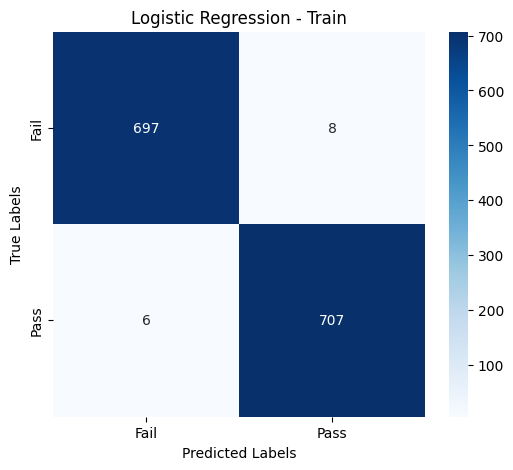


Validation Metrics (Logistic Regression):
Accuracy: 0.6045
F1 Score: 0.5930
ROC-AUC: 0.6753
Confusion Matrix:
[[56 32]
 [38 51]]


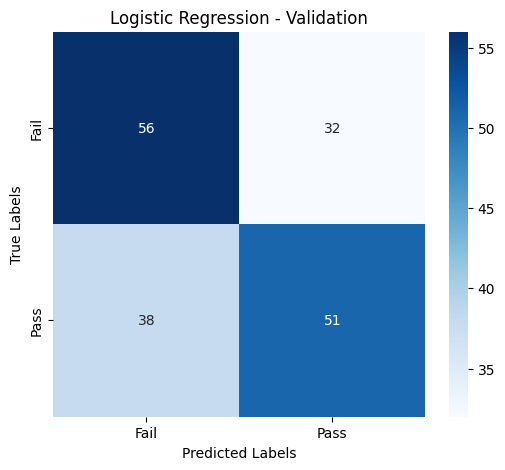


Test Metrics (Logistic Regression):
Accuracy: 0.5955
F1 Score: 0.5955
ROC-AUC: 0.6234
Confusion Matrix:
[[53 35]
 [37 53]]


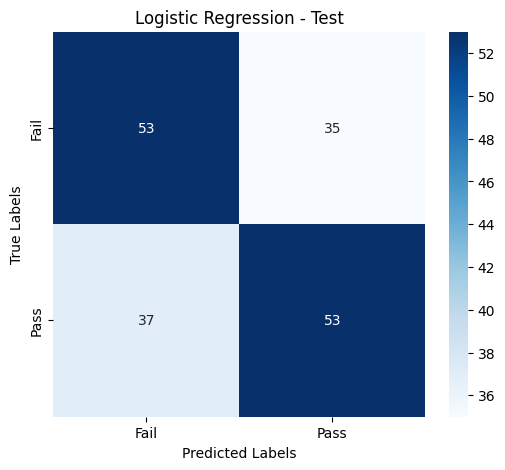

Training Random Forest...

Train Metrics (Random Forest):
Accuracy: 0.9979
F1 Score: 0.9979
ROC-AUC: 1.0000
Confusion Matrix:
[[704   1]
 [  2 711]]


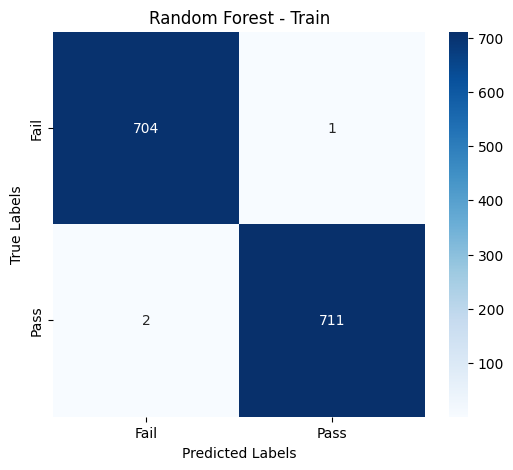


Validation Metrics (Random Forest):
Accuracy: 0.7401
F1 Score: 0.7386
ROC-AUC: 0.8192
Confusion Matrix:
[[66 22]
 [24 65]]


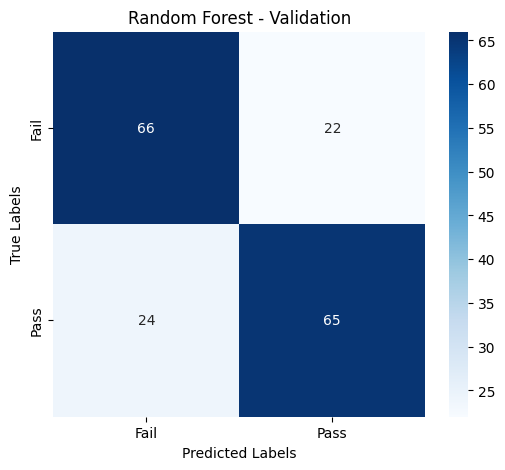


Test Metrics (Random Forest):
Accuracy: 0.6573
F1 Score: 0.6592
ROC-AUC: 0.7345
Confusion Matrix:
[[58 30]
 [31 59]]


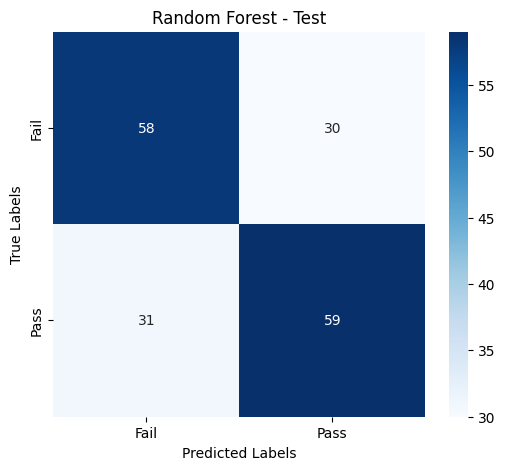

Training SVM...

Train Metrics (SVM):
Accuracy: 0.9965
F1 Score: 0.9965
ROC-AUC: 0.9988
Confusion Matrix:
[[702   3]
 [  2 711]]


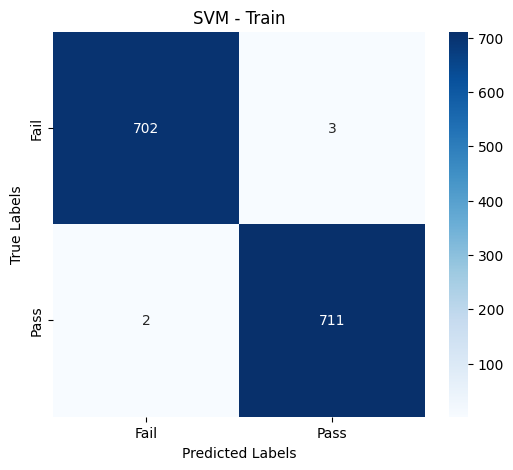


Validation Metrics (SVM):
Accuracy: 0.5650
F1 Score: 0.5746
ROC-AUC: 0.6443
Confusion Matrix:
[[48 40]
 [37 52]]


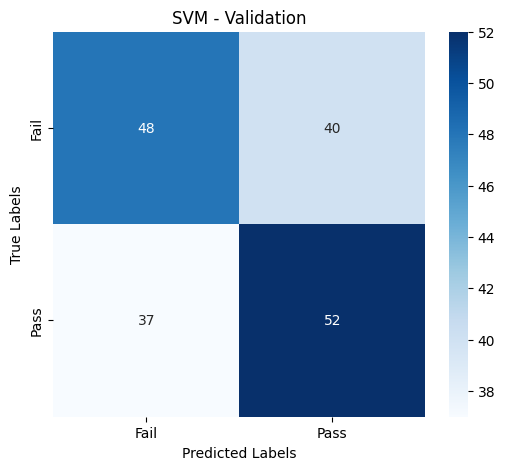


Test Metrics (SVM):
Accuracy: 0.5618
F1 Score: 0.5667
ROC-AUC: 0.5979
Confusion Matrix:
[[49 39]
 [39 51]]


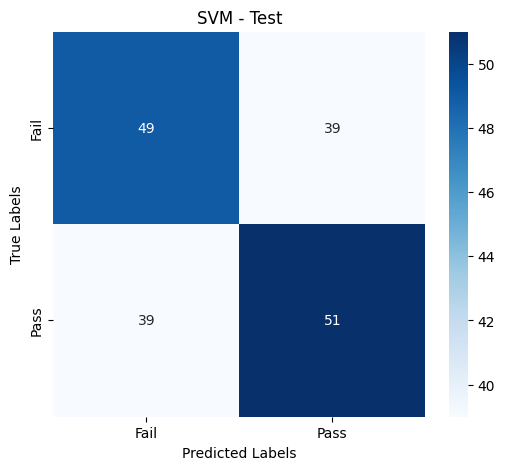

In [7]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Train classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='linear', probability=True, random_state=42)  # Enable probabilities for ROC-AUC
}

# Plot confusion matrix
def plot_confusion_matrix(conf_matrix, title, labels, dataset_name):
    """
    Plots a confusion matrix using Seaborn heatmap.
    """
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f"{title} - {dataset_name}")
    plt.show()

# Evaluate the model and compute metrics
def evaluate_model(classifier, embeddings, labels, dataset_name, classifier_name):
    predictions = classifier.predict(embeddings)
    probabilities = classifier.predict_proba(embeddings)[:, 1]  # For ROC-AUC

    accuracy = accuracy_score(labels, predictions)
    f1 = f1_score(labels, predictions)
    roc_auc = roc_auc_score(labels, probabilities)
    conf_matrix = confusion_matrix(labels, predictions)

    # Print metrics
    print(f"\n{dataset_name} Metrics ({classifier_name}):")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print(f"Confusion Matrix:\n{conf_matrix}")

    # Plot the confusion matrix
    plot_confusion_matrix(conf_matrix, classifier_name, labels=["Fail", "Pass"], dataset_name=dataset_name)

    return accuracy, f1, roc_auc, conf_matrix

# Loop through each classifier
for classifier_name, classifier in classifiers.items():
    print(f"Training {classifier_name}...")
    classifier.fit(train_embeddings, train_labels)

    # Evaluate on train data
    evaluate_model(classifier, train_embeddings, train_labels, "Train", classifier_name)

    # Evaluate on validation data
    evaluate_model(classifier, val_embeddings, val_labels, "Validation", classifier_name)

    # Evaluate on test data
    evaluate_model(classifier, test_embeddings, test_labels, "Test", classifier_name)


In [ ]:
model_name = 'distilroberta'
model = RobertaForSequenceClassification.from_pretrained("distilroberta-base", num_labels=2)  
results_df = pd.DataFrame(columns=[
    "model", "split", "accuracy", "f1_score", "roc_auc", 
    "true_negatives", "true_positives", "false_positives", "false_negatives", "precision", "recall", 
    "true_negative_rate", "false_negative_rate", "false_positive_rate"])
# Define evaluation metrics
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = logits.argmax(axis=-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average="weighted")
    acc = accuracy_score(labels, predictions)
    # Confusion Matrix
    cm = confusion_matrix(labels, predictions)
    tn, fp, fn, tp = cm.ravel()
    # ROC-AUC Score (binary classification assumed)
    roc_auc = roc_auc_score(labels, logits[:, 1])#, multi_class='ovr')
    # Plot and save confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Failed", "Passed"])
    disp.plot(cmap=plt.cm.Blues)
    disp.ax_.set_title(f"{model_name}, data split: {datasplit}")
    plt.savefig(f'./output/figures/{model_name}_{datasplit}_confusion_matrix.jpeg')
    #plt.savefig(f"./output/figures/distilroberta_confusion_matrix_epoch_{trainer.state.epoch}.png")
    #plt.close()
    plt.show()
    # Append results to DataFrame
    results_df.loc[len(results_df)] = {
        "model": model_name, 
        "split": datasplit, # 
        "accuracy": acc,
        "f1_score": f1, 
        "roc_auc": roc_auc,
        "true_negatives": tn, 
        "true_positives": tp,
        "false_positives": fp,
        "false_negatives": fn, 
        "precision": precision, 
        "recall": recall, 
        "true_negative_rate": tn/(tn+fp), 
        "false_negative_rate": fn/(fn+tp), 
        "false_positive_rate": fp/(fp+tn)
    }